In [ ]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from mnist import MNIST
mndata = MNIST('/Users/wltrimbl/git/python-mnist/data')
images, labels = mndata.load_training()
testX, testY = mndata.load_testing()

type(testX), type(testY)

In [ ]:
# convert everything to numpy.
digits = np.array(digits)
labels = np.array(labels)
X=images
Y=labels
testX = np.array(testX)
testY= np.array(testY)

In [ ]:
digits = labels

In [ ]:
digits[0:20]

In [ ]:
digits = np.array(images)

In [ ]:
digits.shape

In [ ]:
p = np.reshape(digits, newshape=( 60000, 28,28))

In [ ]:
p.shape

In [ ]:
plt.imshow(p[4,::])

In [ ]:
plt.subplot(221)
plt.imshow(p[0,::])
plt.subplot(222)
plt.imshow(p[1,::])
plt.subplot(223)
plt.imshow(p[2,::])
plt.subplot(224)
plt.imshow(p[3,::])
plt.savefig("MNIST.png", dpi=300, bbox_inches="tight")

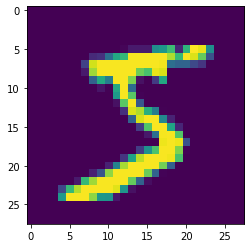

In [59]:
plt.imshow(X[0,:].reshape(28,28))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X, Y)
lr.score(testX, testY)

In [ ]:
lr.coef_.shape

In [ ]:
init = np.sign(lr.coef_[0])*2+2

lr.predict_log_proba(init.reshape((1,-1)))

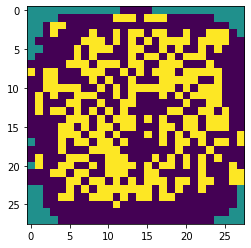

In [58]:
plt.imshow(init.reshape(28,28))

In [61]:
lr.predict_log_proba(X[0,:].reshape((1,-1)))

array([[ -9.33861793, -26.29400983,  -8.41322706,  -1.67387311,
        -21.37586386,  -0.20808996, -22.00412659, -13.4755711 ,
        -10.3443541 , -12.65352844]])

In [62]:
lr.coef_.shape

(10, 784)

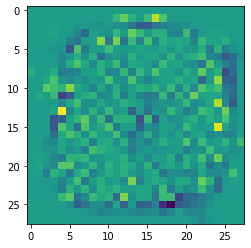

In [63]:
plt.imshow(lr.coef_[0,:].reshape(28,28))

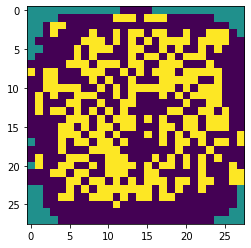

In [64]:
plt.imshow(init.reshape(28,28))

In [65]:
def optim0(image):
    #print(type(image))
    #print(image.shape)
    g=lr.predict_log_proba(X[0,:]+image*init[np.newaxis,:])
    return(-g[0][0])

In [ ]:
from scipy.optimize import minimize
init.shape

In [ ]:
init_flat = init.reshape((1,-1))
init_flat.shape

In [ ]:
type(init_flat)

In [ ]:
optim0(init_flat)

In [ ]:
t = minimize(optim0, [1])

init_flat.shape

In [66]:
t

      fun: 2.053853779336914e-06
 hess_inv: array([[17696.05518039]])
      jac: array([-6.33300652e-06])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([7.23676404])

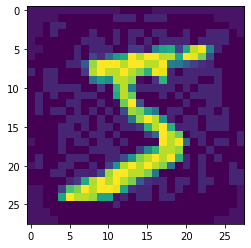

In [67]:
plt.imshow(X[0,:].reshape(28,28) + t.x* init.reshape((28,28)))

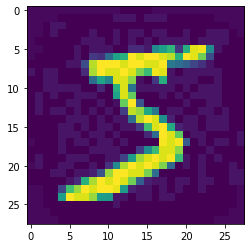

In [73]:
plt.imshow(X[0,:].reshape(28,28) + 3.5* init.reshape((28,28)))

In [72]:
lr.predict((0.5 * t.x*init+X[0,:]).reshape(1,-1))

array([0], dtype=uint8)

In [ ]:
lr.predict_proba((t.x*init+X[0,:]).reshape(1,-1))

In [ ]:
lr.predict_proba((init).reshape(1,-1))

In [ ]:
lr.predict_proba(X[0,:].reshape(1,-1))

In [ ]:
from scipy import optimize


In [ ]:
from numpy import random
init = random.random(size=(28,28))


NameError: name 'fits' is not defined

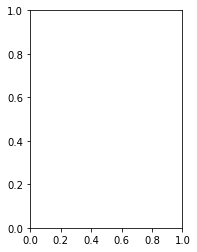

In [60]:
# Let us compare a highly regularized set of linear regression 
# coefficients with a almost-unregularized set.

plt.subplot(1,2,1)
plt.imshow(fits[0].coef_[9,:].reshape((28,28)))
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[9,:].reshape((28,28)))


In [ ]:
# Maybe a diverging colormap would help us here?

plt.subplot(1,2,1)
plt.imshow(fits[1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,2,2)
plt.imshow(fits[-1].coef_[0,:].reshape((28,28)), cmap="RdYlGn")

In [ ]:
accuracy = [f.score(testX, testY) for f in fits]

In [ ]:
plt.plot(crange, accuracy)
plt.semilogx()

In [ ]:
# The regularized parameters should be closer to 0...
plt.hist(fits[-1].coef_[1,:], bins=30)
plt.hist(fits[0].coef_[1,:], bins=30)

In [ ]:
# What about L1 regularization?  This will effectively throw
# out pixels that have too little influence on the result.

fits_l1 = []
for c in crange:
    print(c)
    fits_l1.append(LogisticRegression(C=c, max_iter=100, penalty="l1", solver="liblinear").fit(X, Y))

In [ ]:
accuracy_l1 = [f.score(testX, testY) for f in fits_l1]
plt.plot(crange, accuracy_l1, label="l1")
plt.plot(crange, accuracy, label="l2")
plt.semilogx()
plt.ylim((0.8, 0.95))
plt.legend()
plt.xlabel("Regularization parameter c")
plt.ylabel("Accuracy on holdout set")

In [ ]:
for i in range(len(fits)):
    plt.subplot(1, len(fits), i+1)
    plt.imshow(fits_l1[i].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
    plt.axis("off")

In [ ]:
plt.subplot(1,3,1)
plt.imshow(fits_l1[3].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,2)
plt.imshow(fits_l1[6].coef_[1,:].reshape((28,28)), cmap="RdYlGn")
plt.subplot(1,3,3)
l=0.03
plt.imshow(np.maximum(-l, np.minimum(l, fits_l1[6].coef_[1,:].reshape((28,28)))), cmap="RdYlGn")

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD( 50).fit(X)

In [ ]:
svd.explained_variance_ratio_

In [ ]:
plt.plot(svd.explained_variance_ratio_, 'o')

In [ ]:
svd.components_.shape

In [ ]:
p, a =plt.subplots(1, len(fits))
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svd.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
svdreg = TruncatedSVD( 50).fit(scaler.transform(X))

In [ ]:
plt.plot(svdreg.explained_variance_ratio_, 'o')

In [ ]:
for i in range(25):
    plt.subplot(5,5 , i+1)
    plt.imshow(svdreg.components_[i].reshape((28,28)))
    plt.axis("off")

In [ ]:
# Keep in mind, these are from the variance of the data--no labels
# were used in constructing these vectors.
# And, this procedure is linear in the data; no regularization 
# was applied, just averaging.

In [ ]:
# Now we can project X onto the PCA components; we do 
# this by matrix multiplication

In [ ]:
svd.components_.shape

In [ ]:
PC = np.dot( X, svd.components_.T)

In [ ]:
PC.shape

In [ ]:
h = {0: "black", 1:"brown", 2:"red", 3:"orange", 4:"yellow",
    5:"green", 6:"blue", 7:"purple", 8:"grey", 9:"white"}
colorlabels = []
for i,l in enumerate(Y):
    colorlabels.append(h[l])


In [ ]:
plt.scatter(PC[0:1000,0], PC[0:1000,2] , c= colorlabels[0:1000])

In [ ]:
# Calculate average digits
avgdigit =[]
stddigit =[]
for i in range(10):
    avgdigit.append(images[np.where(labels==i)].mean(axis=0).reshape((28,28)))
    stddigit.append(images[np.where(labels==i)].std(axis=0).reshape((28,28)))
avgdigit=np.array(avgdigit)
avgdigit.shape

In [ ]:
avgdigit_reshape = avgdigit.reshape((10, -1))

In [ ]:
svd_avg = TruncatedSVD(9).fit(scaler.transform(avgdigit_reshape))

In [ ]:
svd_avg.components_.shape

In [ ]:
PC = np.dot(svd_avg.components_, X.T).T

In [ ]:
plt.scatter(PC[0:1000,0], PC[0:1000,1] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,2], PC[0:1000,3] , c= colorlabels[0:1000])

In [ ]:
plt.scatter(PC[0:1000,4], PC[0:1000,5] , c= colorlabels[0:1000])